**Лабораторна робота 3.**

Морфологічна обробка зображень

**Мета**: ознайомитися з можливостями мови Python щодо виконання операцій морфологічної обробки бінарних зображень.

**Середовище розробки**: Google Colaboratory

**Завдання**

1. У каталозі Stones на сторінці дистанційного курсу у системі Moodle (https://do.nmu.org.ua/mod/folder/view.php?id=108447) знаходяться зображення каменів (www.pexels.com/search/stones). Відкрийте зображення ‘stones_n.jpg’, де n – номер варіанта (номер студента у списку групи). Можна використати будь-яке інше довільне зображення.
2. Представте зображення у відтінках сірого.
3. За допомогою порогового перетворення представте зображення у бінарному вигляді. Величину порогу підберіть емпірично.
4. Виконайте операцію ерозії (binary_erosion()) результуючого бінарного зображення ‘stones_n_binary.jpg’ структурним елементом довільного розміру:
№ варіанта	Форма структурного елемента
1, 10, 19	Ромб
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_erosion.html#scipy.ndimage.binary_erosion

5. Застосуйте операцію дилатації до отриманого результату. По черзі застосовуючи операції дилатації та ерозії, досягніть згладжування контурів і видалення дрібних деталей.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_dilation.html#scipy.ndimage.binary_dilation
6.	Виконайте операцію морфологічного розмикання бінарного зображення ‘stones_n_binary.jpg’. Застосуйте операцію морфологічного замикання до отриманого результату. Форма і розмір структурного елемента вибирається довільно у відповідності із забезпеченням найкращого візуального сприйняття результуючого зображення.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_opening.html#scipy.ndimage.binary_opening
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_closing.html#scipy.ndimage.binary_closing

За результатами виконання роботи підготуйте та захистіть звіт.



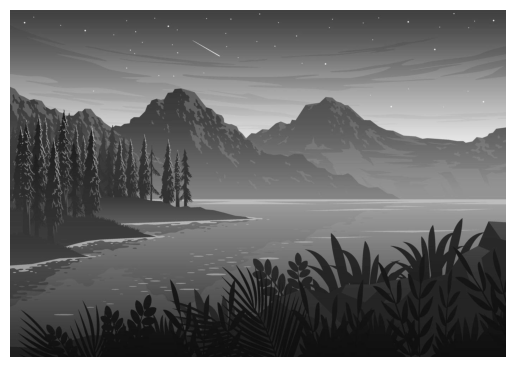

In [1]:
# 1. У каталозі Stones на сторінці дистанційного курсу у системі Moodle (https://do.nmu.org.ua/mod/folder/view.php?id=108447)
# знаходяться зображення каменів (www.pexels.com/search/stones). Відкрийте зображення ‘stones_n.jpg’, де n – номер варіанта (номер студента у списку групи).
# Можна використати будь-яке інше довільне зображення.
# 2. Представте зображення у відтінках сірого.
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.ndimage import measurements, morphology
from scipy import ndimage

def display(im, cmap=None, title=None):
  plt.imshow(im, cmap=cmap)
  plt.axis("off")
  if title != None:
    plt.title(title)
  plt.show()

img = Image.open('example.jpg').convert('L')
img_array = np.array(img)
display(img_array, cmap='gray')

<ipython-input-2-527681504c83>:3: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels, nbr_objects = measurements.label(img1)


Number of objects: 266


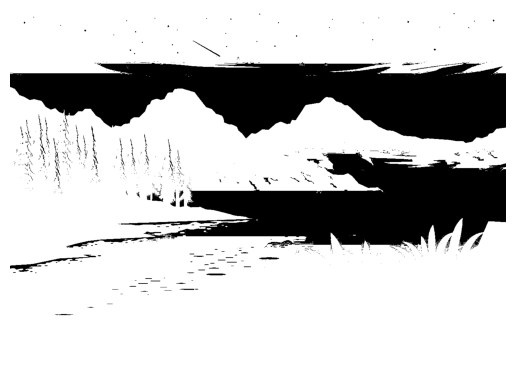

In [2]:
# 3. За допомогою порогового перетворення представте зображення у бінарному вигляді. Величину порогу підберіть емпірично.
img1=1*(img_array<128)
labels, nbr_objects = measurements.label(img1)
print("Number of objects:", nbr_objects)
display(img1, 'gray')

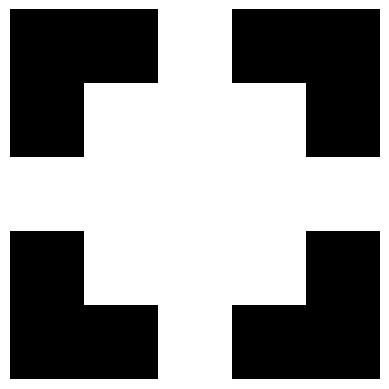

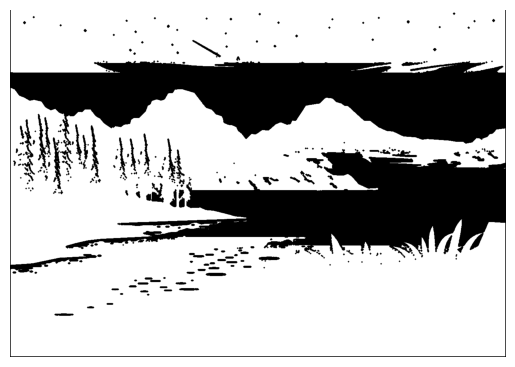

In [3]:
# 4. Виконайте операцію ерозії (binary_erosion()) результуючого бінарного зображення ‘stones_n_binary.jpg’
# структурним елементом довільного розміру:
# № варіанта	Форма структурного елемента
# 1, 10, 19	Ромб

# Розмір ромба
size = 5

# Створення масиву для ромба
diamond = np.zeros((size, size), dtype=bool)

# Заповнення ромба одиницями
for i in range(size):
    for j in range(size):
        if abs(i - size//2) + abs(j - size//2) <= size//2:
            diamond[i, j] = 1
display(diamond, 'gray')

erosed = ndimage.binary_erosion(img1, structure=diamond)
display(erosed, 'gray')

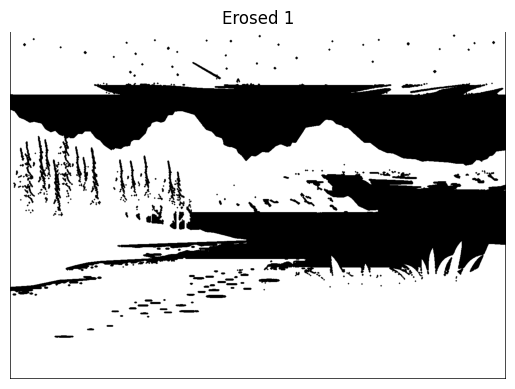

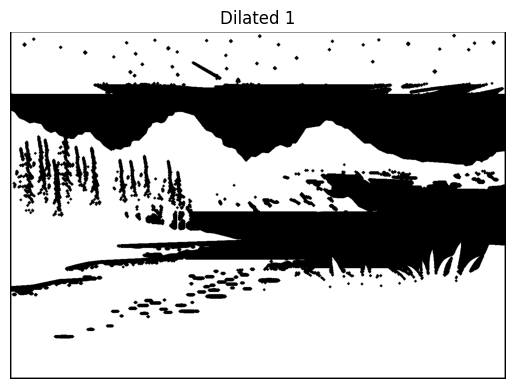

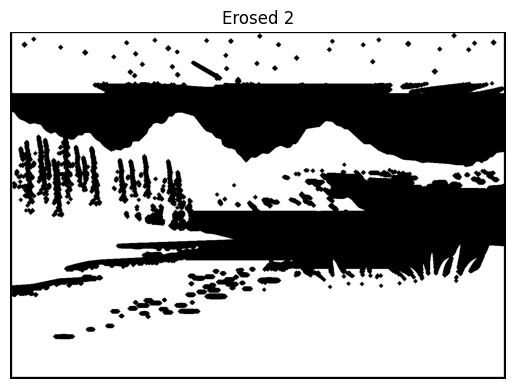

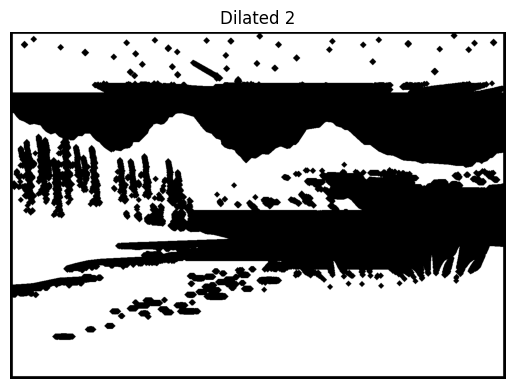

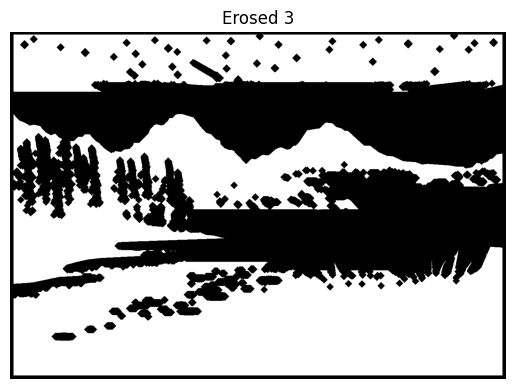

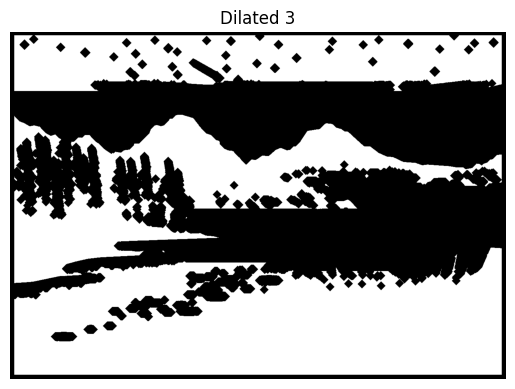

In [4]:
# 3. Застосуйте операцію дилатації до отриманого результату. По черзі застосовуючи операції дилатації та ерозії,
# досягніть згладжування контурів і видалення дрібних деталей.
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_dilation.html#scipy.ndimage.binary_dilation
erosed = ndimage.binary_erosion(img1, structure=diamond)
display(erosed, 'gray', 'Erosed 1')
dilated = ndimage.binary_erosion(erosed, structure=diamond)
display(dilated, 'gray', 'Dilated 1')
erosed = ndimage.binary_erosion(dilated, structure=diamond)
display(erosed, 'gray', 'Erosed 2')
dilated = ndimage.binary_erosion(erosed, structure=diamond)
display(dilated, 'gray', 'Dilated 2')
erosed = ndimage.binary_erosion(dilated, structure=diamond)
display(erosed, 'gray', 'Erosed 3')
dilated = ndimage.binary_erosion(erosed, structure=diamond)
display(dilated, 'gray', 'Dilated 3')

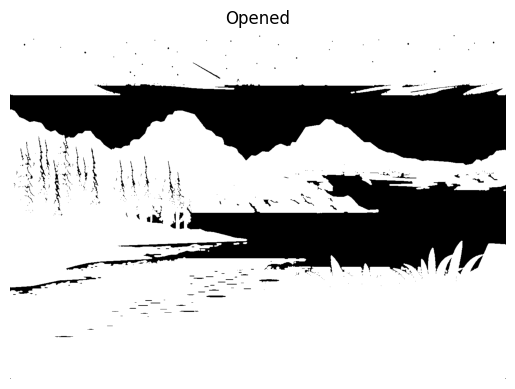

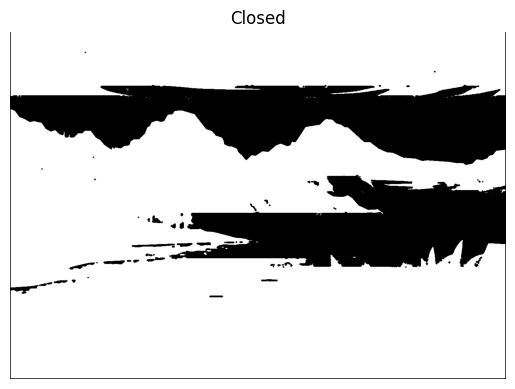

In [5]:
# ⦁	Виконайте операцію морфологічного розмикання бінарного зображення ‘stones_n_binary.jpg’.
# Застосуйте операцію морфологічного замикання до отриманого результату. Форма і розмір структурного елемента вибирається довільно у відповідності із забезпеченням найкращого візуального сприйняття результуючого зображення.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_opening.html#scipy.ndimage.binary_opening
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_closing.html#scipy.ndimage.binary_closing
opened = ndimage.binary_opening(img1, structure=diamond)
display(opened, 'gray', 'Opened')
closed = ndimage.binary_closing(img1, structure=diamond)
display(closed, 'gray', 'Closed')

**Висновки**

У ході даної роботи було використано власне зображення, переведено його у чорно-біле. Вибрано поріг і перетворено у бінарне зображення. Після чого виконано операцію ерозія та дилатації. Бачимо, що ерозія зменшує кількість білого, а дилатація збільшує. Причому використання структури у вигляді ромбу перетворює наші фігури на більш ромбоподібні, що добре видно на дрібних елементах, наприклад зірочках. Також було здійснено операцію замикання до зображення.